In [38]:
from TestDataSet import TestData
import torch
import pandas as pd
import DbUtil
import CrudRepository

In [39]:



saved_data = torch.load("data.pth")

# Create mock input data
mock_data = {
    "CUSTOMER_country": [],
    "PRODUCT_name": [],
    "PRODUCT_category": [],
    "PRODUCT_sub_category": [],
    "DAY_QUARTER_nr": [],
    "DAY_MONTH_nr": [],
}

country = 'USA'
product = 'LL Road Pedal'
category = 'Components'
subCategory = 'Pedals'

for i in range(1, 13):
    q = (i - 1) // 3 + 1

    mock_data["CUSTOMER_country"].append(country)
    mock_data["PRODUCT_name"].append(product)
    mock_data["PRODUCT_category"].append(category)
    mock_data["PRODUCT_sub_category"].append(subCategory)
    mock_data["DAY_MONTH_nr"].append(i)
    mock_data["DAY_QUARTER_nr"].append(q)

testData = TestData(saved_data)
result_df = testData.predict(mock_data)

usedColumns = ['CUSTOMER_country', 'PRODUCT_name', 'PRODUCT_category', 'PRODUCT_sub_category', 'DAY_QUARTER_nr',
               'DAY_MONTH_nr', 'Predicted_price']

r2 = result_df[usedColumns]

# Print the result
print('R2')

INPUT SIZE 293, HIDDEN SIZE 8, NUM CLASS 1
    CUSTOMER_country_Australia  CUSTOMER_country_CAN  CUSTOMER_country_Canada  \
0                            0                     0                        0   
1                            0                     0                        0   
2                            0                     0                        0   
3                            0                     0                        0   
4                            0                     0                        0   
5                            0                     0                        0   
6                            0                     0                        0   
7                            0                     0                        0   
8                            0                     0                        0   
9                            0                     0                        0   
10                           0                     0              

In [40]:
graphCols = ['PRODUCT_name', 'DAY_MONTH_nr', 'Predicted_price']
graphData = r2[graphCols]
graphData

,PRODUCT_name,DAY_MONTH_nr,Predicted_price
0,LL Road Pedal,1,5.395813
1,LL Road Pedal,2,21.655445
2,LL Road Pedal,3,5.395813
3,LL Road Pedal,4,125.524666
4,LL Road Pedal,5,5.395813
5,LL Road Pedal,6,36.593922
6,LL Road Pedal,7,5.395813
7,LL Road Pedal,8,5.395813
8,LL Road Pedal,9,5.395813
9,LL Road Pedal,10,5.395813


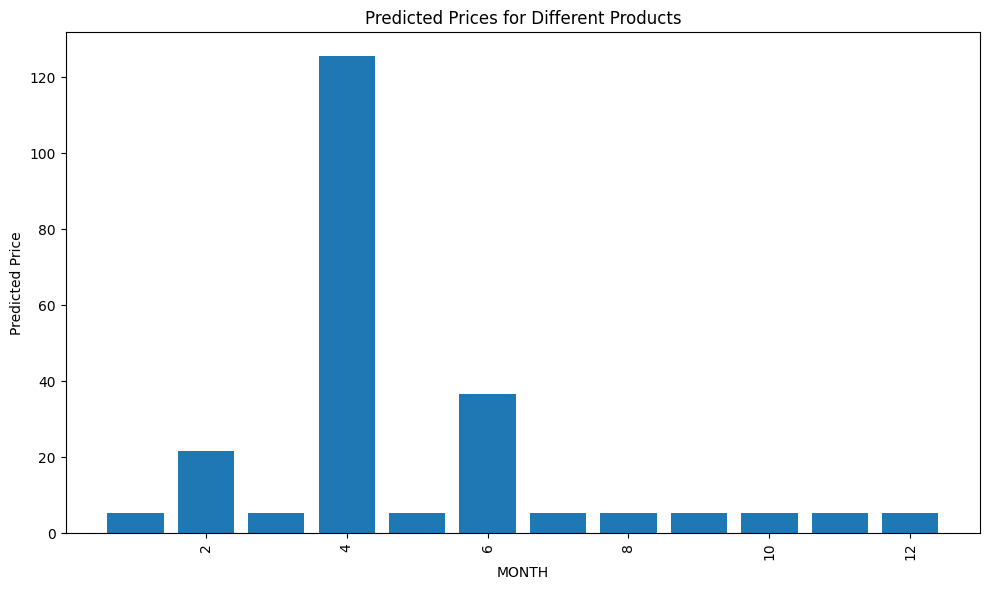

In [41]:
import matplotlib.pyplot as plt

# Assuming you have already defined the 'graphData' DataFrame

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(graphData['DAY_MONTH_nr'], graphData['Predicted_price'])
plt.xlabel('MONTH')
plt.ylabel('Predicted Price')
plt.title('Predicted Prices for Different Products')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the graph
plt.show()

In [42]:
connectionString = DbUtil.constructConnectionString('OutdoorFusion')
dataRepository = CrudRepository.findAll(connectionString, 'Order_Details')

order_details = CrudRepository.findAll(connectionString, 'Order_Details')
product = CrudRepository.findAll(connectionString, 'Product')
customer = CrudRepository.findAll(connectionString, 'Customer')
employee = CrudRepository.findAll(connectionString, 'Employee')
dayDate = CrudRepository.findAll(connectionString, 'Order_Date')

mergedData = pd.merge(order_details, product, on='PRODUCT_id')
mergedData = pd.merge(mergedData, customer, on='CUSTOMER_id')

column = 'PRODUCT_name'
product = 'LL Road Pedal'

filtered_data = mergedData[mergedData['PRODUCT_name'] == 'LL Road Pedal']

selectColumns = ['CUSTOMER_country', 'PRODUCT_name', 'PRODUCT_category', 'PRODUCT_sub_category',
                 'ORDER_DETAIL_unit_price']
selectedData = filtered_data[selectColumns]

In [43]:
selectedData

,CUSTOMER_country,PRODUCT_name,PRODUCT_category,PRODUCT_sub_category,ORDER_DETAIL_unit_price
11229,Canada,LL Road Pedal,Components,Pedals,24.294
11230,Canada,LL Road Pedal,Components,Pedals,24.294
11231,Canada,LL Road Pedal,Components,Pedals,24.294
11232,Canada,LL Road Pedal,Components,Pedals,24.294
11683,United States,LL Road Pedal,Components,Pedals,24.294
...,...,...,...,...,...
93182,United States,LL Road Pedal,Components,Pedals,24.294
106299,United States,LL Road Pedal,Components,Pedals,24.294
106300,France,LL Road Pedal,Components,Pedals,24.294
106301,United States,LL Road Pedal,Components,Pedals,24.294


In [44]:
# Get data
connectionString = DbUtil.constructConnectionString('OutdoorFusion')
dataRepository = CrudRepository.findAll(connectionString, 'Order_Details')

order_details = CrudRepository.findAll(connectionString, 'Order_Details')
product = CrudRepository.findAll(connectionString, 'Product')
customer = CrudRepository.findAll(connectionString, 'Customer')
employee = CrudRepository.findAll(connectionString, 'Employee')
dayDate = CrudRepository.findAll(connectionString, 'Order_Date')


mergedData = pd.merge(order_details, product, on='PRODUCT_id')
mergedData = pd.merge(mergedData, customer, on='CUSTOMER_id')

column = 'PRODUCT_name'
product = 'LL Road Pedal'

filtered_data = mergedData[mergedData['PRODUCT_name'] == 'LL Road Pedal']

selectColumns = ['CUSTOMER_country','PRODUCT_name','PRODUCT_category','PRODUCT_sub_category','ORDER_DETAIL_unit_price']
selectedData = filtered_data[selectColumns]

In [45]:
customer

,CUSTOMER_id,CUSTOMER_address,CUSTOMER_city,CUSTOMER_state,CUSTOMER_region,CUSTOMER_country,CUSTOMER_company_name
0,0,Obere Str. 57,Berlin,None,None,Germany,Alfreds Futterkiste
1,1,Avda. de la Constitución 2222,México D.F.,None,None,Mexico,Ana Trujillo Emparedados y helados
2,2,Mataderos 2312,México D.F.,None,None,Mexico,Antonio Moreno Taquería
3,3,120 Hanover Sq.,London,None,None,UK,Around the Horn
4,4,Berguvsvägen 8,Luleå,None,None,Sweden,Berglunds snabbköp
...,...,...,...,...,...,...,...
19331,29328,"39, avenue des Laurentides",Paris La Defense,Hauts de Seine,None,France,Recreation Toy Store
19332,29329,Suite 2502 410 Albert Street,Waterloo,Ontario,None,Canada,Retreat Inn
19333,29330,Ontario Mills,Ontario,California,None,United States,Technical Parts Manufacturing
19334,29331,72540 Blanco Rd.,San Antonio,Texas,None,United States,Totes & Baskets Company


In [46]:
unique_countries = customer['CUSTOMER_country'].unique()
unique_countries

array(['Germany', 'Mexico', 'UK', 'Sweden', 'France', 'Spain', 'Canada',
       'Argentina', 'Switzerland', 'Brazil', 'Austria', 'Italy',
       'Portugal', 'USA', 'Venezuela', 'Ireland', 'Belgium', 'Norway',
       'Denmark', 'Finland', 'Poland', 'CAN', 'Australia',
       'United States', 'United Kingdom'], dtype=object)

In [47]:
mapping_dict = {
    'United States': 'USA',
    'United Kingdom': 'UK',
    'CAN': 'Canada'
}

# Replace the values in the 'country' column
customer['CUSTOMER_country'] = customer['CUSTOMER_country'].replace(mapping_dict)

In [48]:
customer

,CUSTOMER_id,CUSTOMER_address,CUSTOMER_city,CUSTOMER_state,CUSTOMER_region,CUSTOMER_country,CUSTOMER_company_name
0,0,Obere Str. 57,Berlin,None,None,Germany,Alfreds Futterkiste
1,1,Avda. de la Constitución 2222,México D.F.,None,None,Mexico,Ana Trujillo Emparedados y helados
2,2,Mataderos 2312,México D.F.,None,None,Mexico,Antonio Moreno Taquería
3,3,120 Hanover Sq.,London,None,None,UK,Around the Horn
4,4,Berguvsvägen 8,Luleå,None,None,Sweden,Berglunds snabbköp
...,...,...,...,...,...,...,...
19331,29328,"39, avenue des Laurentides",Paris La Defense,Hauts de Seine,None,France,Recreation Toy Store
19332,29329,Suite 2502 410 Albert Street,Waterloo,Ontario,None,Canada,Retreat Inn
19333,29330,Ontario Mills,Ontario,California,None,USA,Technical Parts Manufacturing
19334,29331,72540 Blanco Rd.,San Antonio,Texas,None,USA,Totes & Baskets Company


In [49]:
unique_countries = customer['CUSTOMER_country'].unique()
unique_countries

array(['Germany', 'Mexico', 'UK', 'Sweden', 'France', 'Spain', 'Canada',
       'Argentina', 'Switzerland', 'Brazil', 'Austria', 'Italy',
       'Portugal', 'USA', 'Venezuela', 'Ireland', 'Belgium', 'Norway',
       'Denmark', 'Finland', 'Poland', 'Australia'], dtype=object)